# Del 4: Strojno učenje: K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

## Introduction to K-Nearest Neighbors

### Problem definition

### Introduction to the data

In [2]:
import pandas as pd

dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [3]:
dc_listings.head(3)

host_response_rate host_acceptance_rate  host_listings_count  accommodates  \
0                92%                  91%                   26             4   
1                90%                 100%                    1             6   
2                90%                 100%                    2             1   

         room_type  bedrooms  bathrooms  beds    price cleaning_fee  \
0  Entire home/apt       1.0        1.0   2.0  $160.00      $115.00   
1  Entire home/apt       3.0        3.0   3.0  $350.00      $100.00   
2     Private room       1.0        2.0   1.0   $50.00          NaN   

  security_deposit  minimum_nights  maximum_nights  number_of_reviews  \
0          $100.00               1            1125                  0   
1              NaN               2              30                 65   
2              NaN               2            1125                  1   

    latitude  longitude         city zipcode state  
0  38.890046 -77.002808   Washington   20003    DC  
1  38.880413 -76.990485   Washington   20003    DC  
2  38.955291 -76.986006  Hyattsville   20782    MD

### K-nearest neighbors

### Euclidean distance

In [4]:
import numpy as np

our_acc_value = 3

In [5]:
first_value = dc_listings.iloc[0]['accommodates']

In [6]:
first_value

4

In [7]:
np.abs(first_value-our_acc_value)

1

### Calculate distance for all observations

In [8]:
import numpy as np

new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x-new_listing))



In [9]:
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

### Randomizing, and sorting

In [10]:
import numpy as np

np.random.seed(1)



In [11]:
np.random.permutation(5)

array([2, 1, 4, 0, 3])

In [12]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [13]:
dc_listings = dc_listings.sort_values('distance')

In [14]:
dc_listings.head(10)['price']

2926     $99.00
75       $99.00
1074    $125.00
115     $569.00
1080    $246.00
3042     $95.00
2384    $169.00
626     $130.00
3226     $91.00
1467     $94.00
Name: price, dtype: object

### Average price

In [15]:
dc_listings['price'] = dc_listings['price'].str.replace(',','').str.replace('$','').astype('float')

In [16]:
dc_listings.head(10)['price']

2926     99.0
75       99.0
1074    125.0
115     569.0
1080    246.0
3042     95.0
2384    169.0
626     130.0
3226     91.0
1467     94.0
Name: price, dtype: float64

In [17]:
mean_price = dc_listings.iloc[0:5]['price'].mean()
mean_price

227.6

### Function to make predictions

In [18]:
np.random.seed(1)

dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [19]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbours = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbours.mean()
    return predicted_price
    
   






In [20]:
acc_one = predict_price(1)

In [21]:
acc_one

68.0

In [22]:
acc_two = predict_price(2)

In [23]:
acc_two

112.8

In [24]:
acc_four = predict_price(4)

In [25]:
acc_four

124.8

## Evaluating Model Performance

### Testing quality of predictions

In [26]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("data/dc_airbnb.csv")

In [27]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [28]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [29]:
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

In [30]:
test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [31]:
test_df.head(3)

host_response_rate host_acceptance_rate  host_listings_count  \
2792                20%                  75%                    1   
2793               100%                  25%                    2   
2794                NaN                  NaN                    1   

      accommodates        room_type  bedrooms  bathrooms  beds  price  \
2792             2  Entire home/apt       0.0        1.0   1.0  120.0   
2793             3  Entire home/apt       2.0        2.0   1.0  140.0   
2794             4  Entire home/apt       2.0        1.0   1.0  299.0   

     cleaning_fee security_deposit  minimum_nights  maximum_nights  \
2792          NaN              NaN               1            1125   
2793       $75.00          $150.00               2            1125   
2794          NaN              NaN               2            1125   

      number_of_reviews   latitude  longitude        city zipcode state  \
2792                  8  38.922187 -77.032475  Washington   20009    DC   
2793                  7  38.931681 -77.044739  Washington   20010    DC   
2794                  5  38.933765 -77.031488  Washington   20010    DC   

      predicted_price  
2792            104.0  
2793            177.4  
2794            145.8

### Error Metrics

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

In [32]:
test_df['error'] = np.absolute(test_df['price'] - test_df['predicted_price'])

In [33]:
mae = test_df['error'].mean()

In [34]:
mae

56.29001074113876

###  Mean Squared Error

$MSE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2}$

In [35]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [36]:
mse = test_df['squared_error'].mean()

In [37]:
mse

18646.525370569325

### Training another model

In [38]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [39]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

In [40]:
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

In [41]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [42]:
mse

18646.525370569325

### Root Mean Squared Error

In [43]:
rmse = mse**(1/2)
rmse

136.55228072269364

### Comparing MAE and RMSE

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

$RMSE = \sqrt { \frac{ \sum_{k=1}^{n} (actual_1 - predicted_1)^2 + \cdots + (actual_n - predicted_n)^2 } {n} }$

In [44]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [45]:
mae_one = errors_one.mean()

In [46]:
rmse_one = (errors_one**2).mean()**(1/2)

In [47]:
mae_one

7.5

In [48]:
rmse_one

7.905694150420948

In [49]:
mae_two = errors_two.sum()/len(errors_two)

In [50]:
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))

In [51]:
mae_two

62.5

In [52]:
rmse_two

235.82302686548658

## Multivariate K-Nearest Neighbors

In [53]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [54]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [55]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [56]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude          

### Removing features

In [57]:
dc_listings.head(2)

host_response_rate host_acceptance_rate  host_listings_count  \
574                100%                 100%                    1   
1593                87%                 100%                    2   

      accommodates     room_type  bedrooms  bathrooms  beds  price  \
574              2  Private room       1.0        1.0   1.0  125.0   
1593             2  Private room       1.0        1.5   1.0   85.0   

     cleaning_fee security_deposit  minimum_nights  maximum_nights  \
574           NaN          $300.00               1               4   
1593       $15.00              NaN               1              30   

      number_of_reviews   latitude  longitude        city zipcode state  
574                 149  38.913548 -77.031981  Washington   20009    DC  
1593                 49  38.953431 -77.030695  Washington   20011    DC

In [58]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count']

In [59]:
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [60]:
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

### Handling missing values

In [61]:
drop_columns = ['cleaning_fee', 'security_deposit']
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [62]:
dc_listings.isnull().sum()

accommodates          0
bedrooms             21
bathrooms            27
beds                 11
price                 0
minimum_nights        0
maximum_nights        0
number_of_reviews     0
dtype: int64

In [63]:
dc_listings = dc_listings.dropna(axis = 0)

In [64]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [65]:
dc_listings.head(3)

accommodates  bedrooms  bathrooms  beds  price  minimum_nights  \
574              2       1.0        1.0   1.0  125.0               1   
1593             2       1.0        1.5   1.0   85.0               1   
3091             1       1.0        0.5   1.0   50.0               1   

      maximum_nights  number_of_reviews  
574                4                149  
1593              30                 49  
3091            1125                  1

### Normalize columns

In [66]:
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()

In [67]:
normalized_col = first_transform / first_transform.std()

In [68]:
normalized_col[0:5]

574    -0.016604
1593   -0.016603
3091   -0.016573
420    -0.016584
808    -0.016553
Name: maximum_nights, dtype: float64

In [69]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()

In [70]:
normalized_listings.head()

accommodates  bedrooms  bathrooms      beds     price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858 -0.173345       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858 -0.464148       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858 -0.718601       -0.341375   
420      -0.596544 -0.249467  -0.439151 -0.546858  0.437342        0.487635   
808       4.393004  4.507903   1.264998  2.829956  0.480962       -0.065038   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  
420        -0.016584          -0.448301  
808        -0.016553           0.646219

In [71]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()
normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858  125.0       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858   85.0       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858   50.0       -0.341375   
420      -0.596544 -0.249467  -0.439151 -0.546858  209.0        0.487635   
808       4.393004  4.507903   1.264998  2.829956  215.0       -0.065038   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  
420        -0.016584          -0.448301  
808        -0.016553           0.646219

### Euclidean distance for multivariate case

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }
$

In [72]:
from scipy.spatial import distance

In [73]:
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)
dist

0.852074

In [74]:
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]

In [75]:
first_listing

accommodates   -0.596544
bathrooms      -0.439151
Name: 574, dtype: float64

In [76]:
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

In [77]:
fifth_listing

accommodates    4.393004
bathrooms       1.264998
Name: 808, dtype: float64

In [78]:
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)

In [79]:
first_fifth_distance

5.272543124668404

### Introduction to scikit-learn

In [110]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [111]:
knn = KNeighborsRegressor(algorithm='brute')

###  Fitting a model and making predictions

In [112]:
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [113]:
train_features = train_df[['accommodates', 'bathrooms']]

In [114]:
train_target = train_df['price']

In [115]:
knn.fit(train_features, train_target)

KNeighborsRegressor(algorithm='brute')

In [116]:
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [117]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

In [88]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

In [89]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)

In [90]:
train_feature = train_df[train_columns]
train_target = train_df['price']

knn.fit(train_feature, train_target)

KNeighborsRegressor(algorithm='brute')

In [91]:
predictions = knn.predict(test_df[train_columns])

In [92]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

### Calculating MSE using Scikit-Learn

In [118]:
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']



In [119]:
two_features_mse = mean_squared_error(test_df['price'], predictions)

In [120]:
two_features_mse

15600.51385665529

In [121]:
two_features_rmse = two_features_mse**(1/2)

In [122]:
two_features_rmse

124.90201702396679

### Using more features

In [123]:
features = ['accommodates', 'bedrooms', 
            'bathrooms', 'number_of_reviews']

In [124]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) **(1/2)

In [126]:
four_features_rmse

115.42284176217056

In [102]:
four_mse = mean_squared_error(test_df['price'], four_predictions)

NameError: name 'four_predictions' is not defined

In [ ]:
four_mse

In [ ]:
four_rmse = four_mse ** (1/2)

In [ ]:
four_rmse

### Using all features

In [103]:
features = train_df.columns.tolist()
features.remove('price')

In [104]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) **(1/2)

In [105]:
four_features_rmse

124.31924883701363

In [ ]:
#če vklopimo vsa polja je napoved slabša

In [106]:
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)

NameError: name 'all_features_predictions' is not defined

In [107]:
all_features_mse

NameError: name 'all_features_mse' is not defined

In [108]:
all_features_rmse = all_features_mse ** (1/2)

NameError: name 'all_features_mse' is not defined

In [109]:
all_features_rmse

NameError: name 'all_features_rmse' is not defined

## Hyperparameter Optimization

In [127]:
import pandas as pd

In [128]:
train_df = pd.read_csv('data/dc_airbnb_train.csv') 

In [129]:
test_df = pd.read_csv('data/dc_airbnb_test.csv')

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [131]:
hyper_params = list(range(1,21))

In [132]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [133]:
rmse_values = list()

In [134]:
for hp in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=hp)
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) **(1/2)
    rmse_values.append(rmse)

In [135]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818,
 116.8644114827833,
 119.5335680743671,
 121.87472331580857,
 121.12320961628912,
 121.00599769826847,
 121.3839832139696,
 121.87927087700685,
 121.3802368756651,
 121.56469838918429,
 121.53651569258713,
 121.94334139200811,
 121.78915596074519,
 121.58779942206421,
 121.55490412561835,
 121.14845432917468]

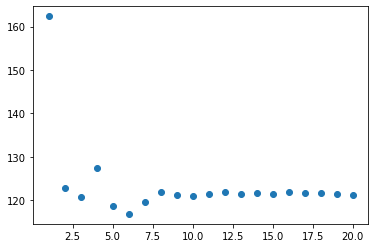

In [136]:
import matplotlib.pyplot as plt
plt.scatter(x = hyper_params, y=rmse_values)
plt.show()

### Expanding grid search

In [137]:
hyper_params = list(range(1,21))
mse_values = list()
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [138]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [139]:
mse_values

[26364.92832764505,
 15100.52246871445,
 14579.597901655923,
 16212.300767918088,
 14090.011649601822,
 13657.290671217292,
 14288.273896589353,
 14853.448183304892,
 14670.831907751512,
 14642.451478953355,
 14734.071380889252,
 14854.556669510808,
 14733.16190399257,
 14777.975894453346,
 14771.124646694478,
 14870.178509847838,
 14832.598509630716,
 14783.592968300116,
 14775.594716988267,
 14676.947986348125]

### Visualizing hyperparameter values

In [140]:
hyper_parms =  [x for x in range(1,21)]
mse_values = list()

In [141]:
features = train_df.columns.to_list()
features

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [142]:
features.remove('price')

### Varying features and hyperparameters

In [143]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

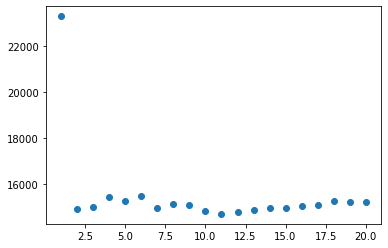

In [144]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the workflow

In [145]:
two_features = ['accommodates', 'bathrooms']

In [146]:
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [147]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

In [148]:
two_lowest_mse = two_mse_values[0]

In [149]:
two_lowest_mse

26926.755403868032

In [150]:
for k, mse in enumerate(two_mse_values):
    print(k, mse)

0 26926.755403868032
1 20520.37087599545
2 16105.879155606117
3 15341.923065984072
4 14790.314266211606
5 15067.653836430289
6 15550.246035615612
7 15469.115152161547
8 15309.432885293332
9 15215.682081911264
10 16786.523133914387
11 16418.107010807737
12 16329.89425853747
13 16433.576849852572
14 16762.924095563143
15 16754.500071103528
16 16914.910727430903
17 16930.557086475932
18 17675.784103693757
19 17602.475116609785


In [152]:
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k, mse in enumerate (two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k+1
    

In [153]:
two_features_mse, two_lowest_k

(15600.51385665529, 5)

In [156]:
three_features = ['accommodates', 'bathrooms', 'bedrooms']

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

In [157]:
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k, mse in enumerate (three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k+1

In [160]:
three_lowest_mse

13518.769009310208

## Cross Validation

In [161]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [162]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

In [163]:
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

### Holdout Validation

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [165]:
# First half
model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one["predicted_price"] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one["predicted_price"])**(1/2)

In [166]:
iteration_one_rmse

131.6207283081407

In [167]:
# Second half
model = KNeighborsRegressor()
model.fit(train_two[['accommodates']], train_two['price'])
test_two["predicted_price"] = model.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], test_two["predicted_price"])**(1/2)

In [168]:
iteration_two_rmse

128.77209995637674

In [169]:
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

In [170]:
avg_rmse

130.19641413225872

### K-Fold Cross Validation

In [171]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [172]:
dc_listings['fold'].value_counts()

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

In [173]:
dc_listings['fold'].isnull().sum()

0

### First iteration

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error








### Function for training models

In [ ]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

In [ ]:
def train_and_validate(df, folds):


In [ ]:
rmses = train_and_validate(dc_listings, fold_ids)

In [ ]:
rmses

In [ ]:
avg_rmse = np.mean(rmses)

In [ ]:
avg_rmse

###  Performing K-Fold Cross Validation Using Scikit-Learn

In [174]:
from sklearn.model_selection import cross_val_score, KFold

In [175]:
kf = KFold(5, shuffle = True, random_state=1)

In [176]:
knn = KNeighborsRegressor()

In [179]:
mses = cross_val_score(knn,
                       dc_listings[['accommodates']],
                       dc_listings['price'],
                       scoring = 'neg_mean_squared_error',
                       cv=kf)

In [180]:
mses

array([-28321.07511409, -13829.76987919, -22768.27742282,  -9285.8494086 ,
       -12532.78451613])

In [181]:
avg_rmse = np.mean(np.sqrt(np.absolute(mses)))

In [182]:
avg_rmse

129.01866963719164

###  Exploring Different K Values

In [190]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn,
                       dc_listings[['accommodates']],
                       dc_listings['price'],
                       scoring = 'neg_mean_squared_error',
                       cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print("folds: ", str(fold), "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    
    



folds:  3 avg RMSE:  133.39155832923973 std RMSE:  11.086603336206089
folds:  5 avg RMSE:  129.01866963719164 std RMSE:  26.49026525380437
folds:  7 avg RMSE:  128.2563631358857 std RMSE:  24.433778651168502
folds:  9 avg RMSE:  127.32586680970088 std RMSE:  37.14784717325374
folds:  10 avg RMSE:  125.76801286044285 std RMSE:  34.17044630953882
folds:  11 avg RMSE:  128.05794633376306 std RMSE:  28.189791000247233
folds:  13 avg RMSE:  135.19672255133156 std RMSE:  37.393562781262155
folds:  15 avg RMSE:  129.36948920791744 std RMSE:  32.19005631512455
folds:  17 avg RMSE:  129.95026068075245 std RMSE:  42.23205089616785
folds:  19 avg RMSE:  123.23092426546866 std RMSE:  36.25629204751065
folds:  21 avg RMSE:  123.74230115930078 std RMSE:  40.953451986202275
folds:  23 avg RMSE:  124.80660657221455 std RMSE:  44.4282428992255


###  Bias-Variance Tradeoff

## Vaja: Predicting Car Prices

### Introduction To The Data Set

In [191]:
import pandas as pd
import numpy as np

In [192]:
# imena stolpcev

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [193]:
cars = pd.read_csv('data/imports-85.data', names=cols)

In [194]:
# Select only the columns with continuous values from
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols].copy()



In [195]:
numeric_cars.head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0                 ?        88.6   168.8   64.1    48.8         2548   
1                 ?        88.6   168.8   64.1    48.8         2548   
2                 ?        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine-size  bore stroke  compression-rate horsepower peak-rpm  city-mpg  \
0          130  3.47   2.68               9.0        111     5000        21   
1          130  3.47   2.68               9.0        111     5000        21   
2          152  2.68   3.47               9.0        154     5000        19   
3          109  3.19   3.40              10.0        102     5500        24   
4          136  3.19   3.40               8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

### Data Cleaning

In [196]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

normalized-losses  wheel-base  length  width  height  curb-weight  \
0               NaN        88.6   168.8   64.1    48.8         2548   
1               NaN        88.6   168.8   64.1    48.8         2548   
2               NaN        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine-size  bore stroke  compression-rate horsepower peak-rpm  city-mpg  \
0          130  3.47   2.68               9.0        111     5000        21   
1          130  3.47   2.68               9.0        111     5000        21   
2          152  2.68   3.47               9.0        154     5000        19   
3          109  3.19   3.40              10.0        102     5500        24   
4          136  3.19   3.40               8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

In [197]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [198]:
numeric_cars = numeric_cars.astype('float')

In [199]:
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [200]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [202]:
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [203]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [204]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [205]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col

In [206]:
numeric_cars.describe()

normalized-losses  wheel-base      length       width      height  \
count         201.000000  201.000000  201.000000  201.000000  201.000000   
mean            0.298429    0.355598    0.494045    0.477697    0.497222   
std             0.167520    0.176862    0.183913    0.179613    0.203985   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             0.188482    0.230321    0.383582    0.324786    0.350000   
50%             0.298429    0.303207    0.479104    0.444444    0.525000   
75%             0.376963    0.460641    0.632836    0.538462    0.641667   
max             1.000000    1.000000    1.000000    1.000000    1.000000   

       curb-weight  engine-size        bore      stroke  compression-rate  \
count   201.000000   201.000000  201.000000  201.000000        201.000000   
mean      0.414145     0.248587    0.564793    0.565192          0.197767   
std       0.200658     0.156781    0.191480    0.150499          0.250310   
min       0.000000     0.000000    0.000000    0.000000          0.000000   
25%       0.264158     0.139623    0.435714    0.495238          0.100000   
50%       0.359193     0.222642    0.550000    0.580952          0.125000   
75%       0.557797     0.301887    0.742857    0.638095          0.150000   
max       1.000000     1.000000    1.000000    1.000000          1.000000   

       horsepower    peak-rpm    city-mpg  highway-mpg         price  
count  201.000000  201.000000  201.000000   201.000000    201.000000  
mean     0.258864    0.394934    0.338308     0.386489  13207.129353  
std      0.174606    0.195148    0.178423     0.179346   7947.066342  
min      0.000000    0.000000    0.000000     0.000000   5118.000000  
25%      0.102804    0.265306    0.166667     0.236842   7775.000000  
50%      0.219626    0.394934    0.305556     0.368421  10295.000000  
75%      0.317757    0.551020    0.472222     0.473684  16500.000000  
max      1.000000    1.000000    1.000000     1.000000  45400.000000

### Univariate Model

In [247]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) /2)
    
    #izberemo training dataset (prva polovica podatkov)
    train_df = rand_df.iloc[0:last_train_row]
    
    #testni dataset (druga polovica podatkov)
    test_df = rand_df.iloc[last_train_row:]
    
    #streniramo model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #izračunamo napoved za testne podatke
    predict_labels = knn.predict(test_df[[train_col]])
    
    #izračunamo in vrnemo RMSE
    mse = mean_squared_error(test_df[target_col], predict_labels)
    rmse =  np.sqrt(mse)
    return rmse
    

In [248]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

#sprehodimo se skozi stolpce
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [249]:
#naredimo dinamične k-je

def knn_train_test(train_col, target_col, df, k_values):
    
    np.random.seed(1)
    
    #premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) /2)
    
    #izberemo training dataset (prva polovica podatkov)
    train_df = rand_df.iloc[0:last_train_row]
    
    #testni dataset (druga polovica podatkov)
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
    #streniramo model
        knn.fit(train_df[[train_col]], train_df[target_col])
    
    #izračunamo napoved za testne podatke
        predict_labels = knn.predict(test_df[[train_col]])
    
    #izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predict_labels)
        rmse =  np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [250]:
k_values = [1, 3, 5, 7, 9]
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

#sprehodimo se skozi stolpce
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars, k_values = k_values)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


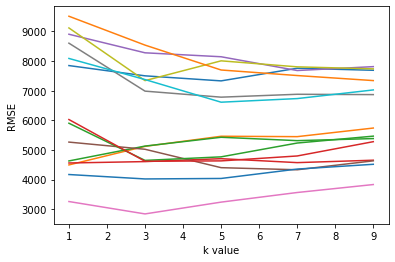

In [251]:
import matplotlib.pyplot as plt

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

### Multivariate Model

In [252]:
def knn_train_test(train_col, target_col, df, k_values =[5]):
    
    np.random.seed(1)
    
    #premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) /2)
    
    #izberemo training dataset (prva polovica podatkov)
    train_df = rand_df.iloc[0:last_train_row]
    
    #testni dataset (druga polovica podatkov)
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
    #streniramo model
        knn.fit(train_df[train_col], train_df[target_col])
        
    
    #izračunamo napoved za testne podatke
        predict_labels = knn.predict(test_df[train_col])
    
    #izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predict_labels)
        rmse =  np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [253]:
feature_avg_rmse = {}
for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print (sorted_series_avg_rmse)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [254]:
sorted_features = sorted_series_avg_rmse.index
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [255]:
 k_rmse_results = {}
    
for nr_best_feats in range (2, 9):
    k_rmse_results[f'{nr_best_feats} best features'] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)
    
k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539},
 '7 best features': {5: 3359.9444892279203},
 '8 best features': {5: 3647.155382671067}}

### Hyperparameter Tuning

In [256]:
def knn_train_test(train_col, target_col, df, k_values =[i for i in range (1, 25)]):
    
    np.random.seed(1)
    
    #premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) /2)
    
    #izberemo training dataset (prva polovica podatkov)
    train_df = rand_df.iloc[0:last_train_row]
    
    #testni dataset (druga polovica podatkov)
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
    #streniramo model
        knn.fit(train_df[train_col], train_df[target_col])
        
    
    #izračunamo napoved za testne podatke
        predict_labels = knn.predict(test_df[train_col])
    
    #izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predict_labels)
        rmse =  np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [257]:
k_rmse_results = {}
    
for nr_best_feats in range (2, 8):
    k_rmse_results[f'{nr_best_feats} best features'] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)
    
k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

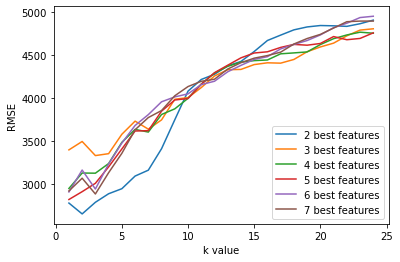

In [259]:
import matplotlib.pyplot as plt

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())    
    plt.plot(x,y, label = f"{k}")
             
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
#Najboljša izbira sta 2 značilki. Engine size + Horse power in k = 2